
# Práctica 3: Metaheurísticas basadas en poblaciones - Algoritmos Genéticos

<center><h3>
    Pedro López-Chaves Pérez
</h3></center>


## Instrucciones

Esto es **Jupyter Notebook**, un documento que integra código Python en un archivo Markdown.
Esto nos permite ir ejecutando celdas de código poco a poco, así como generar automáticamente un informe bien formateado de la práctica.

Puedes añadir una celda con el botón **"Insert"** de la barra de herramentas, y cambiar su tipo con **"Cell > Cell Type"**

Para ejecutar una celda de código, la seleccionaremos y pulsaremos el botón **"▶ Run"** de la barra de herramentas.
Para pasar el documento a HTML, seleccionaremos **"File > Download as > HTML (.html)"**

Sigue este guión hasta el final. Ejecuta el código proporcionado paso a paso comprendiendo lo que estás haciendo y reflexionando sobre los resultados. Habrá preguntas intercaladas a lo largo del guión, responde a todas ellas en la sección reservada para ese fin: **"Respuestas a los cuestionarios"**. Por favor, no modifiques ninguna linea de código excepto cuando se te pida explícitamente.

No olvides insertar tu **nombre y apellidos** en la celda superior.

IMPORTANTE: Escribe el código de tu o tus soluciones/respuestas en las celdas que se indican para ello. Además, a lo largo de la práctica se plantearán varias preguntas que debéis responder en la parte inferior del documento, incluyendo las celdas que veáis necesarias (si hacéis referencia a partes concretas de vuestro código, etc) para reponder a ellas.

## Entrega de la práctica

La fecha límite de entrega será la indicada en el Campus Virtual. La entrega consistirá de un único archivo comprimido con nombre `APELIDOS_NOME_Geneticos.zip` que contenga los seguientes ficheros:

 * `APELIDOS_NOME_Geneticos.html`: Archivo HTML fruto de la exportación del presente Notebook, con las preguntas respondidas al final del documento.
 * `APELIDOS_NOME_Geneticos.ipynb`: Archivo fuente Jupyter Notebook.
 * Archivo de datos de los problema utilizados en la resolución.


## Preliminares adicionales sobre Python


Para esta práctica, te sugerimos algunas funciones de paquetes que pueden resultarte útiles en la realización de esta práctica.

Has visto que cuando realizas laboratorios y pruebas para ajustar parámetros resulta necesario tener una estimación del tiempo invertido en la ejecución. Eso ayuda a valorar el balance del tiempo computacional frente a la inclusión de valores de parámetros en el laboratorio. En ese sentido, puede resultar conveniente añadir barras de progreso que además te permitan visualizar el progreso de resolución de las iteraciones. Para ese propósito podéis hacer uso del paquete `tqdm` (https://tqdm.github.io/). 

Puedes ver ejemplos en detalle descritos en https://towardsdatascience.com/progress-bars-for-python-with-tqdm-4dba0d4cb4c

Veámos un ejemplo ilustrativo aquí.

In [3]:
# solo debes importarlo una vez en el notebook.
# fíjate que estamos importando del paquete tqdm.notebook para que incorpore los decoradores compatibles en Jupyter 
# (en Python podrías importar simplemente desde el paquete tdqm)
from tqdm.notebook import trange, tqdm

`tqdm` permite añadir una barra de progreso que informe sobre el tiempo y el paso de iteraciones. En el ejemplo, la variable `nit` son el número de iteraciones a realizar y para conseguir que se visualize el progreso se pasa a `tqdm` un iterador de rango.

In [4]:
from random import randint

heads = 0
tails = 0
nit=1000000
for i in tqdm(range(nit), desc='Coin Flip Progress'):
    toss = randint(0, 1)
    if toss == 0:
        heads += 1
    else:
        tails += 1

Coin Flip Progress:   0%|          | 0/1000000 [00:00<?, ?it/s]

El paquete nos ofrece la posibilidad combinar `tdqm(range(NUM_IT))` en una única función, llamada `trange(NUM_IT)`. Veamos su funcionamiento en el siguiente ejemplo, que muestra también cómo podemos hacer cuando necesitamos llevar cuenta del progreso en bucles anidados.

In [3]:
num_games = 3

for game in trange(num_games, desc='Overall Progress'):
    heads = 0
    tails = 0
    nit=1000000
    for j in trange((nit), desc=f'Game {game+1} Progress'):
        toss = randint(0, 1)
        if toss == 0:
            heads += 1
        else:
            tails += 1
            
    print(f'Heads: {heads}, Tails: {tails}')


Overall Progress:   0%|          | 0/3 [00:00<?, ?it/s]

Game 1 Progress:   0%|          | 0/1000000 [00:00<?, ?it/s]

Heads: 499140, Tails: 500860


Game 2 Progress:   0%|          | 0/1000000 [00:00<?, ?it/s]

Heads: 500344, Tails: 499656


Game 3 Progress:   0%|          | 0/1000000 [00:00<?, ?it/s]

Heads: 500274, Tails: 499726


Aprovechamos para recordarte que puedes utilizar semillas en la generación de secuencias de números aleatorios para hacer determinista y más verificable tu implementación. 

In [5]:
import random
import time

In [6]:
# este vector será aleatorio si no habíamos establecido una semilla previamente.
# Podríamos tener incluso una semilla basada en el tiempo actual para forzar que se aleatorice 
# si ejecutamos esta celda múltiples veces
random.seed(time.time())

vector_aleatorio = [ random.randint(1, 10) for i in range(1,10) ]
print ("vector aleatorio ", vector_aleatorio)

# aquí establecemos una semilla totalmente fija
# que no depende del tiempo y por tanto está bajo nuestro control
semilla = 123456
random.seed (semilla)

# este viene determinado por la semilla
vector_aleatorio = [ random.randint(1, 10) for i in range(1,10) ]
print ("vector aleatorio ", vector_aleatorio)

# y ahora somos capaces de generar la misma serie "aleatoria"
random.seed (semilla)
vector_aleatorio = [ random.randint(1, 10) for i in range(1,10) ]
print ("vector aleatorio igual que el anterior", vector_aleatorio)


vector aleatorio  [6, 10, 10, 7, 6, 10, 7, 3, 1]
vector aleatorio  [5, 1, 3, 1, 2, 1, 5, 1, 2]
vector aleatorio igual que el anterior [5, 1, 3, 1, 2, 1, 5, 1, 2]


Esto puede ser útil para verificar que siempre obtienes los mismos resultados ante el mismo conjunto de entradas.

## El Problema del Viajante de Comercio (VC) con Algoritmos Genéticos

El objetivo de esta práctica es modelar e implementar un agente inteligente que sea capaz de resolver el problema del VC mediante la metaheurística (MH) de poblaciones conocida como Algoritmo Genético (GA, del inglés *Genetic  Algorithm*). Para ello, realizarás una implementación del algoritmo básico visto en la clase expositiva y valorarás si la introducción de modificaciones en el diseño del algoritmo te permite mejorar la calidad de las soluciones alcanzadas.


### Definición del problema de Viajante de Comercio (VC)


La definición del problema sigue la descripción ya vista en las prácticas anterior, en la que se disponía de una represetación del problema mediante un grafo ponderado. Así que, en primer lugar importa el módulo Python que acompaña esta práctica, que ya trae las funciones de apoyo como la clase `Localizaciones` que implementaba la carga de datos y que utilizaba una matriz de adyacencia.

In [7]:
from helpers_mod_ga import *

Si todo va bien, la primera distancia entre la ciudad 0 y 1 debe ser unos 55 km para el problema de las 8 ciudades gallegas.

In [8]:
g1=Localizaciones(filename='./data/grafo8cidades.txt')
print (g1.distancia(0,1))

55.88273580792048


In [9]:
g1=Localizaciones(filename='./data/US120.txt')


## P3.1: Implementación básica de Algoritmo Genético



Implementa un algoritmo genético básico para resolver el problema del VC, siguiendo la descripción algorítmica de la MH vista en la clase expositiva.

Ten en cuenta las siguientes consideraciones de diseño para completar esta implementación básica:
- Representación  de  las  soluciones:  representación  de  orden  (permutaciones) comenzando y finalizando en la ciudad 0. 

- Población inicial: inicialización completamente aleatoria de la población inicial, que sean permutaciones válidas.

- Operador de cruce: Order Crossover (OX). La función/método que se encargue de hacer el cruce ordenado debe aceptar como parámetros la probabilidad de cruce (por defecto, establecida a pc=0.95), los dos puntos de corte así como los cromosomas sobre los que actuar.

- Operador de mutación: se utilizará el operador de intercambio, aplicado con una probabilidad de mutación. Vuestra implementación debe manejar dos variantes de esta función:
    - Mutación individual: solo se aplica la mutación, si procede, sobre un único gen en el cromosoma. La probabilidad de mutación por defecto se establece pm=0.25. Esta función debería recibir el índice del gen sobre el que actuar además de la probabilidad de mutación y el cromosoma original.
    - Mutación cromosómica: se aplica la mutación contemplando todo el cromosoma, de forma que individualmente puede mutar cada gen de manera independiente según una probabilidad de mutación, establecida por defecto a pm=0.01.

- El reemplazo de la generación debe seguir un modelo de reemplazo generacional con elitismo. En particular, tu implementación debe disponer de dos variantes de la función de reemplazo:
    - mitades: haz que la mitad de la población resultante del reemplazo provenga de la generación actual mientras que la otra mitad provenga de los descendientes, tomando en ambos casos los mejores individuos. 
    - elitismo "elite=2": de esta forma, hay que mantener los 2 mejores individuos de la generación actual/ancestros; mientras que el resto provienen de entre los mejores hijos. La función de reemplazo debería parametrizar "elite".
    
Ambas variantes deben recibir como parámetro la lista de cromosomas de las poblaciones ascentros e hijos generados y retornar la población resultante.
    

- Condición de parada simple basado en un número de iteraciones máximo pasado como parámetro.

- La implementación debe ser completamente parametrizable, de forma que todos los componentes susceptibles de ser ajustados mediante parámetros deberían puedan ser establecidos en cada ejecución/problema.


Lanza varias ejecuciones para verificar que puede resolver el problema con los siguientes grafos de
ejemplo:
- grafo 8 ciudades gallegas (`data/grafo8cidades.txt`), con una población de 2 individuos y 150 iteraciones.
- grafo 120 ciudades estadounidenses (`data/US120.txt`), con una población de 32 individuos y 500 iteraciones.


Si no te convergiera, prueba a extender el número de iteraciones o variar parámetros como la probabilidad de mutación.



In [10]:
import random
#funcion de generacion aleatoria de S0
def generar_S0(longitud_vector):
    vector = [x for x in range (1,longitud_vector)]
    random.shuffle(vector)
    return vector

def generar_pobacion(n, tam):
    return [generar_S0(tam) for i in range(n)]

In [11]:
#funcion coste del camino
def coste(camino):
    longitud_vector=len(camino)
    coste = g1.distancia(0,camino[0])
    coste += g1.distancia(camino[longitud_vector-1],0)
    for i in range(longitud_vector-1):
        coste += g1.distancia(camino[i],camino[i+1])
    return coste

In [12]:
# Función adicional que dada una población, genera para cada solución
# una dupla con la solución y su coste.
# Además, ya devolverá las soluciones ordenadas por su coste.
def poblacion_con_costes(poblacion):
    duplas = [(sol, coste(sol)) for sol in poblacion]
    return sorted(duplas, key=lambda d: d[1])

# Función que copia toda la población a un nuevo array.
def copia_poblacion(poblacion):
    return [sol.copy() for sol in poblacion]

In [13]:
from itertools import permutations

# SELECCIÓN DE HIJOS
def permutaciones(poblacion):
    indices = list(range(len(poblacion)))
    pares = []

    for perm in permutations(indices, 2):
        i, j = perm
        if i < j:  # Asegurarse de que siempre i < j para evitar duplicados
            pares.append((poblacion[i],poblacion[j]))
    return pares

In [14]:
#funcion que termina de crear el hijo para simplificar el codigo
def crear_hijo(hijo, padre, corte2, tam):
    posP = corte2 + 1
    if posP > tam - 1:
        posP = 0
    posH = posP
    
    for i in range(0, len(hijo)):
        if hijo[posH] is None:
            if padre[posP] not in hijo:
                hijo[posH] = padre[posP]
                posH += 1
            posP += 1
        else:
            posH += 1
        if posP > tam - 1:
            posP = 0
        if posH > tam - 1:
            posH = 0

# realizamos el cruce de los padres y obtenemos los hijos
def cruce(par, pc):
    
    if random.uniform(0, 1) > pc:
        return par
    
    tam = len(par[0])
    
    corte1 = random.randint(0,tam-2)
    corte2 = random.randint(corte1+1,tam-1)
    #print("Puntos de cruce: ",corte1,corte2)
    
    hijo0, hijo1 = [None] * tam, [None] * tam
    for i in range(corte1, corte2 + 1):
        hijo0[i], hijo1[i] = par[1][i],par[0][i]
    #print("Padre 0: ",par[0],"Padre 1: ",par[1])
    #print(hijo0)
    
    crear_hijo(hijo0,par[0],corte2,tam)
    crear_hijo(hijo1,par[1],corte2,tam)
        
    return(hijo0, hijo1)

In [15]:
# MUTACION
#TIPO 0 INDIVIDUAL
#TIPO 1 CROMOSOMICA
def mutar(solucion, mut_ind,mut_crom, tipo):
    #TIPO 0 INDIVIDUAL
    if(tipo == 0):
        if random.uniform(0, 1) <= mut_ind:
            pos1 = random.randint(0, len(solucion)-1)
            pos2 = random.randint(0, len(solucion)-1)
            while(pos2 == pos1):
                pos2 = random.randint(0, len(solucion)-1)

            solucion[pos1], solucion[pos2] = solucion[pos2], solucion[pos1]
    #TIPO 1 CROMOSOMICA
    else:
        for i in range(len(solucion)):
            if random.uniform(0, 1) <= mut_crom:
                pos3 = random.randint(0, len(solucion)-1)
                while( pos3 == i):
                    pos3 = random.randint(0, len(solucion)-1)
                solucion[i], solucion[pos3] = solucion[pos3], solucion[i]
    return solucion

In [16]:
# SELECCION DE NUEVA GENERACION
#TIPO 0 MITADES
#TIPO 1 ELITE 2
def nueva_generacion(n, padres, hijos, tipo):
    nueva_generacion = []
    if tipo == 0:
        padres_costes = poblacion_con_costes(padres)
        hijos_costes = poblacion_con_costes(hijos)
        for i in range(int(len(padres) / 2)):
            nueva_generacion.append(padres_costes[i][0])
            nueva_generacion.append(hijos_costes[i][0])
    else:
        padres_costes = poblacion_con_costes(padres)
        hijos_costes = poblacion_con_costes(hijos)
        for i in range(tipo):
            nueva_generacion.append(padres_costes[i][0])
        for i in range(tipo, len(padres)):
            nueva_generacion.append(hijos_costes[i-tipo][0])
    return nueva_generacion

In [17]:
#TIPO MUTACION: 0 INDIVIUAL / 1 CROMOSÓMICA
#TIPO NUEVA GENERACIÓN: 0 MITADES / 1+ ELITE
def genetico(tam_poblacion, individuos=2, iteraciones=150, prob_cruce=0.95, mut_ind=0.25, mut_crom=0.1, tipo_mutacion=0, tipo_generacion=0):
    
    poblacion = generar_pobacion(individuos, tam_poblacion)
             
    for i in range(iteraciones):
        padres = copia_poblacion(poblacion)
        hijos = []
        for par in permutaciones(poblacion):
            par = cruce(par,prob_cruce)
            for sol in par:
                sol =  mutar(sol, mut_ind, mut_crom,tipo_mutacion)
                hijos.append(sol)
                
        poblacion = nueva_generacion(individuos, padres, hijos,tipo_generacion)
        
    return poblacion_con_costes(poblacion)[0]

In [18]:
#llibrerias para presentar graficos
import time
import statistics
import matplotlib.pyplot as plt

Ejecuciones:   0%|          | 0/1000 [00:00<?, ?it/s]

COSTES POR EJECUCION


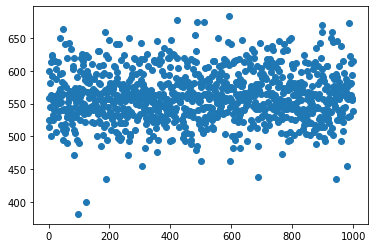

Media de coste_soluciones: 561.3691253798044
Desviación típica de coste_soluciones: 39.04502383073059
Numero de veces que da 381:  1 --- 0.1 %


In [18]:
#8 ciudades
g1=Localizaciones(filename='./data/grafo8cidades.txt')
top=0
genetico(8, individuos=2, iteraciones=150, tipo_generacion=0)     

costes=[]
for i in tqdm(range(1000), desc='Ejecuciones'):
    sol=genetico(8, individuos=2, iteraciones=150, tipo_generacion=1)
    if(sol[1]==381.66996176754816 or sol[1]==381.6699617675482):
        top+=1
    costes.append(sol[1])
print("COSTES POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(costes))], costes)
plt.show()
print("Media de coste_soluciones:", statistics.mean(costes))
print("Desviación típica de coste_soluciones:", statistics.stdev(costes))
print("Numero de veces que da 381: ",top,"---",top/10,"%")

In [19]:
g1=Localizaciones(filename='./data/grafo8cidades.txt')
padres=[[2, 5, 1, 3, 7, 4, 6],[5, 7, 4, 1, 3, 6, 2],[1, 2, 7, 5, 4, 3, 6],[5, 7, 6, 2, 1, 4, 3],[7, 1, 3, 2, 4, 5, 6],[1, 6, 7, 3, 2, 5, 4],[1, 7, 4, 5, 2, 6, 3],[6, 1, 4, 3, 7, 5, 2],[2, 3, 1, 4, 6, 5, 7],[5, 7, 3, 1, 4, 2, 6]]
hijos=[[5, 6, 7, 1, 4, 2, 3],[5, 4, 6, 2, 7, 3, 1],[1, 7, 4, 5, 6, 2, 3],[5, 1, 6, 2, 4, 7, 3],[3, 2, 7, 1, 6, 5, 4],[7, 6, 3, 4, 5, 1, 2],[2, 1, 6, 5, 7, 4, 3],[4, 7, 5, 1, 6, 3, 2],[5, 6, 3, 7, 2, 1, 4],[3, 6, 7, 4, 5, 2, 1]]

padres_costes=poblacion_con_costes(padres)
hijos_costes=poblacion_con_costes(hijos)

print(padres_costes,"\n\n")
print(hijos_costes,"\n\n")

sol=nueva_generacion(8, padres, hijos, 2)
print(sol,"\n\n")

sol_costes=poblacion_con_costes(sol)
print(sol_costes,"\n\n")

[([7, 1, 3, 2, 4, 5, 6], 535.6581360243345), ([1, 6, 7, 3, 2, 5, 4], 587.6170145046397), ([1, 2, 7, 5, 4, 3, 6], 595.1628163688213), ([2, 3, 1, 4, 6, 5, 7], 605.0800402173977), ([5, 7, 6, 2, 1, 4, 3], 629.4766813998899), ([6, 1, 4, 3, 7, 5, 2], 743.0649031321927), ([1, 7, 4, 5, 2, 6, 3], 753.6997982543669), ([5, 7, 3, 1, 4, 2, 6], 761.1780574479973), ([2, 5, 1, 3, 7, 4, 6], 773.473776589229), ([5, 7, 4, 1, 3, 6, 2], 796.2082342395136)] 


[([7, 6, 3, 4, 5, 1, 2], 556.6019897922175), ([3, 6, 7, 4, 5, 2, 1], 583.6741451430188), ([5, 6, 7, 1, 4, 2, 3], 603.8155719629109), ([1, 7, 4, 5, 6, 2, 3], 621.9996054419234), ([2, 1, 6, 5, 7, 4, 3], 637.9472866690551), ([3, 2, 7, 1, 6, 5, 4], 674.2292057159484), ([5, 4, 6, 2, 7, 3, 1], 734.6767339463551), ([4, 7, 5, 1, 6, 3, 2], 749.9245109831239), ([5, 6, 3, 7, 2, 1, 4], 785.9925384408957), ([5, 1, 6, 2, 4, 7, 3], 852.1114412192364)] 


[[7, 1, 3, 2, 4, 5, 6], [1, 6, 7, 3, 2, 5, 4], [7, 6, 3, 4, 5, 1, 2], [3, 6, 7, 4, 5, 2, 1], [5, 6, 7, 1, 4, 2, 3

In [30]:
def cruce(par, pc):
    
    random.seed(2874)
    if random.uniform(0, 1) > pc:
        return par
    
    tam = len(par[0])
    
    corte1 = 1
    corte2 = 6
    #print("Puntos de cruce: ",corte1,corte2)
    
    hijo0, hijo1 = [None] * tam, [None] * tam
    for i in range(corte1, corte2 + 1):
        hijo0[i], hijo1[i] = par[1][i],par[0][i]
    #print("Padre 0: ",par[0],"Padre 1: ",par[1])
    #print(hijo0)
    
    crear_hijo(hijo0,par[0],corte2,tam)
    crear_hijo(hijo1,par[1],corte2,tam)
        
    return(hijo0, hijo1)

In [31]:
par=[[1, 9, 5, 3, 6, 2, 8, 7, 4], [5, 4, 2, 7, 1, 9, 8, 6, 3]]
print(cruce(par, 0.95))

([6, 4, 2, 7, 1, 9, 8, 5, 3], [1, 9, 5, 3, 6, 2, 8, 4, 7])


In [32]:
def mutar(solucion, mut_ind,mut_crom, tipo):
    #TIPO 0 INDIVIDUAL
    if(tipo == 0):
        random.seed(2495)
        if random.uniform(0, 1) <= mut_ind:
            print("Hay cambio")
            pos1 = 8
            pos2 = random.randint(0, len(solucion)-1)
            while(pos2 == pos1):
                print("Hola")
                pos2 = random.randint(0, len(solucion)-1)

            solucion[pos1], solucion[pos2] = solucion[pos2], solucion[pos1]
    #TIPO 1 CROMOSOMICA
    else:
        for i in range(len(solucion)):
            if random.uniform(0, 1) <= mut_crom:
                pos3 = random.randint(0, len(solucion)-1)
                while( pos3 == i):
                    pos3 = random.randint(0, len(solucion)-1)
                solucion[i], solucion[pos3] = solucion[pos3], solucion[i]
    return solucion

In [33]:
cromosoma=[9, 5, 8, 6, 3, 7, 4, 2, 1]
print(mutar(cromosoma, 0.25,0, 0))

Hay cambio
[9, 1, 8, 6, 3, 7, 4, 2, 5]


In [19]:
def mutar(solucion, mut_ind,mut_crom, tipo):
    #TIPO 0 INDIVIDUAL
    if(tipo == 0):
        random.seed(2495)
        if random.uniform(0, 1) <= mut_ind:
            print("Hay cambio")
            pos1 = 8
            pos2 = random.randint(0, len(solucion)-1)
            while(pos2 == pos1):
                print("Hola")
                pos2 = random.randint(0, len(solucion)-1)

            solucion[pos1], solucion[pos2] = solucion[pos2], solucion[pos1]
    #TIPO 1 CROMOSOMICA
    else:
        random.seed(2495)
        for i in range(len(solucion)):
            if random.uniform(0, 1) <= mut_crom:
                pos3 = random.randint(0, len(solucion)-1)
                while( pos3 == i):
                    pos3 = random.randint(0, len(solucion)-1)
                solucion[i], solucion[pos3] = solucion[pos3], solucion[i]
    return solucion

In [29]:
g1=Localizaciones(filename='./data/US120.txt')
cromosoma= [7, 3, 1, 9, 6, 2, 4, 5, 8]
for i in range(1000):
    sol=mutar(cromosoma, 0.11,0, 1)
    print(sol, coste(sol))

[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 

[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 

[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 6, 2, 4, 5, 8] 15943.370846196653
[7, 3, 1, 9, 

In [20]:
def nueva_generacion(n, padres, hijos, tipo):
    nueva_generacion = []
    if tipo == 0:
        padres_costes = poblacion_con_costes(padres)
        hijos_costes = poblacion_con_costes(hijos)
        for i in range(int(len(padres) / 2)):
            nueva_generacion.append(padres_costes[i][0])
            nueva_generacion.append(hijos_costes[i][0])
    else:
        padres_costes = poblacion_con_costes(padres)
        hijos_costes = poblacion_con_costes(hijos)
        for i in range(tipo):
            nueva_generacion.append(padres_costes[i][0])
        for i in range(tipo, len(padres)):
            nueva_generacion.append(hijos_costes[i][0])
    return nueva_generacion

In [98]:
g1=Localizaciones(filename='./data/grafo8cidades.txt')

padres=[[1, 5, 4, 2, 3, 7, 6],[3, 5, 6, 4, 2, 1, 7],[7, 5, 4, 6, 2, 1, 3],[5, 6, 4, 3, 1, 2, 7],[2, 3, 5, 7, 4, 6, 1],[7, 4, 1, 2, 6, 5, 3],[1, 4, 6, 2, 5, 7, 3],[7, 1, 3, 6, 2, 4, 5],[1, 3, 7, 6, 2, 4, 5],[3, 7, 1, 6, 4, 5, 2]]
hijos =[[3, 4, 1, 5, 7, 2, 6],[4, 2, 3, 1, 6, 7, 5],[7, 4, 2, 6, 1, 3, 5],[4, 2, 6, 3, 7, 5, 1],[7, 3, 1, 6, 4, 5, 2],[5, 2, 7, 1, 4, 6, 3],[5, 3, 7, 4, 2, 6, 1],[4, 7, 6, 5, 1, 2, 3],[7, 4, 3, 6, 1, 2, 5],[2, 5, 7, 6, 3, 1, 4]]

padres_costes=poblacion_con_costes(padres)
hijos_costes= poblacion_con_costes( hijos)

print(padres_costes,"\n\n")
print(hijos_costes,"\n\n")

sol=nueva_generacion(8, padres, hijos, 0)

print(sol,"\n\n")

print(poblacion_con_costes(sol))


[([1, 5, 4, 2, 3, 7, 6], 540.8617110321956), ([1, 3, 7, 6, 2, 4, 5], 617.6708799995117), ([7, 5, 4, 6, 2, 1, 3], 618.5516381520847), ([5, 6, 4, 3, 1, 2, 7], 622.8808922513532), ([3, 5, 6, 4, 2, 1, 7], 637.634388312632), ([2, 3, 5, 7, 4, 6, 1], 643.7770734166224), ([7, 4, 1, 2, 6, 5, 3], 697.9826297587528), ([7, 1, 3, 6, 2, 4, 5], 713.7147321741944), ([3, 7, 1, 6, 4, 5, 2], 757.4725818397972), ([1, 4, 6, 2, 5, 7, 3], 788.0915256559139)] 


[([4, 7, 6, 5, 1, 2, 3], 577.1512284178407), ([4, 2, 3, 1, 6, 7, 5], 592.9505557247218), ([7, 3, 1, 6, 4, 5, 2], 698.6148511044817), ([2, 5, 7, 6, 3, 1, 4], 699.4669972721246), ([7, 4, 3, 6, 1, 2, 5], 704.2626025894701), ([7, 4, 2, 6, 1, 3, 5], 745.8368893343857), ([5, 3, 7, 4, 2, 6, 1], 782.4078218610223), ([3, 4, 1, 5, 7, 2, 6], 786.1039666576755), ([4, 2, 6, 3, 7, 5, 1], 808.3054861026836), ([5, 2, 7, 1, 4, 6, 3], 852.5216187221977)] 


[[1, 5, 4, 2, 3, 7, 6], [4, 7, 6, 5, 1, 2, 3], [1, 3, 7, 6, 2, 4, 5], [4, 2, 3, 1, 6, 7, 5], [7, 5, 4, 6, 2, 1, 3

Ejecuciones:   0%|          | 0/5 [00:00<?, ?it/s]

COSTES POR EJECUCION


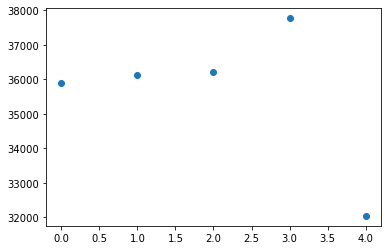

Media de coste_soluciones: 35613.63576242873
Desviación típica de coste_soluciones: 2128.42172497743


In [44]:
#120 ciudades
g1=Localizaciones(filename='./data/US120.txt')
costes=[]
for i in tqdm(range(5), desc='Ejecuciones'):
    sol=genetico(120, individuos=32, iteraciones=500)
    costes.append(sol[1])
print("COSTES POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(costes))], costes)
plt.show()
print("Media de coste_soluciones:", statistics.mean(costes))
print("Desviación típica de coste_soluciones:", statistics.stdev(costes))

Ejecuciones:   0%|          | 0/5 [00:00<?, ?it/s]

COSTES POR EJECUCION


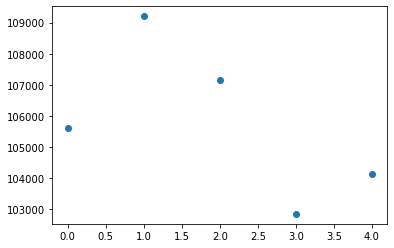

Media de coste_soluciones: 105788.21968876793
Desviación típica de coste_soluciones: 2505.68861284


In [46]:
#120 ciudades
g1=Localizaciones(filename='./data/US120.txt')
costes=[]
for i in tqdm(range(5), desc='Ejecuciones'):
    sol=genetico(120, individuos=32, iteraciones=500, tipo_mutacion=1)
    costes.append(sol[1])
print("COSTES POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(costes))], costes)
plt.show()
print("Media de coste_soluciones:", statistics.mean(costes))
print("Desviación típica de coste_soluciones:", statistics.stdev(costes))

Ejecuciones:   0%|          | 0/5 [00:00<?, ?it/s]

COSTES POR EJECUCION


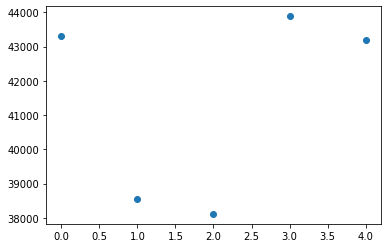

Media de coste_soluciones: 41413.554661028
Desviación típica de coste_soluciones: 2822.499892464664


In [37]:
#120 ciudades
g1=Localizaciones(filename='./data/US120.txt')
costes=[]
for i in tqdm(range(5), desc='Ejecuciones'):
    sol=genetico(120, individuos=32, iteraciones=500, tipo_mutacion=0, tipo_generacion=2)
    costes.append(sol[1])
print("COSTES POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(costes))], costes)
plt.show()
print("Media de coste_soluciones:", statistics.mean(costes))
print("Desviación típica de coste_soluciones:", statistics.stdev(costes))

Ejecuciones:   0%|          | 0/5 [00:00<?, ?it/s]

COSTES POR EJECUCION


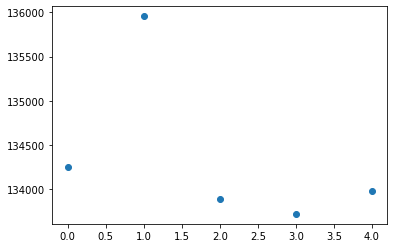

Media de coste_soluciones: 134359.57514694415
Desviación típica de coste_soluciones: 912.6551587227549


In [38]:
#120 ciudades
g1=Localizaciones(filename='./data/US120.txt')
costes=[]
for i in tqdm(range(5), desc='Ejecuciones'):
    sol=genetico(120, individuos=32, iteraciones=500, tipo_mutacion=1, tipo_generacion=2)
    costes.append(sol[1])
print("COSTES POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(costes))], costes)
plt.show()
print("Media de coste_soluciones:", statistics.mean(costes))
print("Desviación típica de coste_soluciones:", statistics.stdev(costes))

❓ **Pregunta 1**. Explica brevemente los detalles relevantes de tu código para entender tu implementación (p.ej., estructura de tu código, funciones, implementación de operadores, etc.). ¿Cuál es el mecanismo de selección escogido para tu implementación? Explica también cómo has verificado tu implementación.

El algoritmo se basa en la funcion principal llamada genetico que tiene los siguientes **parámetros de entrada**:

	-tam_poblacion: tamaño de los caminos que son los individuos de la población
	-individuos: numeros de elementos que tiene la población
	-iteraciones: numero de iteraciones que realiza el algoritmo
	-prob_cruce: probabilidad que establecemos para que se ejecute el algoritmo de cruce o no
	-mut_ind: probabilidad de que se de una mutación cuando usamos la mutacion individual
	-mut_crom: probabilidad de que se de una mutación cuando usamos la mutacion cromosómica
	-tipo_mutacion: selección del tipo de mutación a utilizar
	-tipo_generacion: seleccion del tipo de obtener la nueva generacion
    
Ya dentro de genérico nos encontramos primeramente con generar_poblacion la cual es la funcion encargada de obtener n individuos con un tamaño dado. A continuación, ejecutamos el algoritmo el numero de veces marcado por nuestro parametro iteraciones. Dentro de esto comenzamos creando una copia de la población para no trabajar sobre la original y tambien creamos el array hijos donde guardaremos las soluciones obtenidas de los cruces y mutaciones. 

Mediante la función cruce. realizamos el cruce de los padres para obtener sus hijos. A continuación, mediante la función mutar, probamos si se realiza la mutación y en caso afirmativo de realiza. Los elementos obtenidos los almacenamos finalmente en el array hijos. Por último en la iteración generamos la nueva generación a partir de la cual comenzaremos a trabajar en la sigueinte iteración.

El mecaminsmo de selección escogido para mi implementación es totalmente aleatorio como se indica en el enunciado, y genera el numero de individuos que deseemos de un tamaño dado. Estas soluciones son siempre válidas y obvian los 0s iniciales y finales que contienen.

Para verificar nuestra implementación, hemos realizado una serie de ejecuciones de donde probamos con 8 y 120 ciudades ejecutándose en repetidas ocasiones para obtener resultados más fiables.

## P3.2: Laboratorio

Como toda metaheurística, resulta crucial conocer cómo afecta en términos prácticos los parámetros
del algoritmo y los operadores desarrollados. Estudia el comportamiento del algoritmo implementado para resolver VC atendiendo a las siguientes cuestiones.


❓ **Pregunta 2**. Realiza el estudio de la calidad de la solución variando el tamaño de la población: 1, 2, 4, 8, 16, 32, 64... ¿Qué valor recomendarías para el problema de las 120 ciudades? ¿Por qué? Ten en cuenta que tienes dos variantes del mecanismo de reemplazo.

❓ **Pregunta 3**. Ahora realiza un estudio similar variando la probabilidad de mutación en el rango 0, ..., 0.95 en pasos de 0.05~0.10. ¿Qué valor recomendarías para este parámetro? ¿Por qué? Ten en cuenta que tienes dos variantes del mecanismo de mutación.

❓ **Pregunta 4**. Finalmente realiza un estudio variando el número de iteraciones máximas en el rango de 50 a 1000, considerando un paso variable o adaptativo a conveniencia. ¿Qué valor recomendarías para este parámetro? ¿Por qué? Realiza una discusión reflexionando sobre los resultados conjuntos de estos tres parámetros. 

Apoya todas tus respuestas en datos-gráficos resultantes de tus estudios, reportados de forma que sea fácil de comparar/contrastar.

Importante: además de la calidad de la soluciones obtenidas, se recomienda medir tiempos para tomar medidas operativas sobre el número de repeticiones que permitan realizar promedios (se recomienda no más de 10 si se ralentiza mucho) y prescindir de manera razonada de valores en las series de ejecución que no sean computacionalmente rentables/viables con tu implementación/ordenador (p.ej., tamaños de población elevados pueden tomar mucho tiempo para resolver).






In [21]:
import matplotlib.pyplot as plt
import statistics

In [19]:
def graficar_datos(titulo, etiqueta_x, etiqueta_y, datos_x, datos_y_1, datos_y_2, leyenda_1, leyenda_2):
    """
    Grafica datos dados los parámetros.

    Parameters:
        titulo (str): Título de la gráfica.
        etiqueta_x (str): Etiqueta del eje x.
        etiqueta_y (str): Etiqueta del eje y.
        datos_x (list): Valores del eje x.
        datos_y_1 (list): Valores del primer conjunto de datos.
        datos_y_2 (list): Valores del segundo conjunto de datos.
        leyenda_1 (str): Leyenda para el primer conjunto de datos.
        leyenda_2 (str): Leyenda para el segundo conjunto de datos.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='rectilinear')

    ax.plot(datos_x, datos_y_1, '--', color="green", label=leyenda_1)
    ax.plot(datos_x, datos_y_2, '--', color="red", label=leyenda_2)

    ax.set_title(titulo, fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'tab:blue'})
    ax.set_xlabel(etiqueta_x)
    ax.set_ylabel(etiqueta_y)
    ax.legend()
    
    # Agregar rejilla
    ax.grid(True)

    plt.show()

Ejecuciones generacion mitades:   0%|          | 0/7 [00:00<?, ?it/s]

Ejecuciones generacion elite:   0%|          | 0/7 [00:00<?, ?it/s]

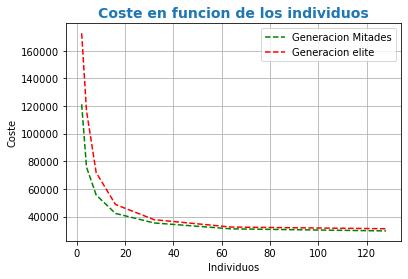

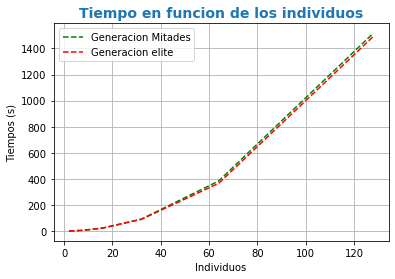

In [49]:
#8 ciudades
g1=Localizaciones(filename='./data/US120.txt')

costes_0=[]
tiempos_0=[]
individuos=[2,4,8,16,32,64,128]
for i in tqdm(range(7), desc='Ejecuciones generacion mitades'):
    tiempos_i=[]
    costes_i=[]
    for k in range(3):
        start_time = time.time()
        sol=genetico(120, individuos=individuos[i], iteraciones=500, tipo_generacion=0)
        tiempos_i.append(time.time() - start_time)
        costes_i.append(sol[1])
    costes_0.append(statistics.mean(costes_i))
    tiempos_0.append(statistics.mean(tiempos_i))

costes_1=[]
tiempos_1=[]
for i in tqdm(range(7), desc='Ejecuciones generacion elite'):
    tiempos_i=[]
    costes_i=[]
    for k in range(3):
        start_time = time.time()
        sol=genetico(120, individuos=individuos[i], iteraciones=500, tipo_generacion=1)
        tiempos_i.append(time.time() - start_time)
        costes_i.append(sol[1])
    costes_1.append(statistics.mean(costes_i))
    tiempos_1.append(statistics.mean(tiempos_i))

graficar_datos("Coste en funcion de los individuos","Individuos","Coste",individuos,costes_0,costes_1,"Generacion Mitades","Generacion elite")
graficar_datos("Tiempo en funcion de los individuos","Individuos","Tiempos (s)",individuos,tiempos_0,tiempos_1,"Generacion Mitades","Generacion elite")

Tras esta prueba, la solución que sacamos es que los mejores resultados se empizan a obtener a partir de 64 individuos y despues de esto la mejora no justifica el tiempo de ejecución que se dispara. Con 32 individuos los resultados ya son buenos y los tiempos se mejoran sustancialmente.
La diferencia de tiempos entre 32 y 64 es muy  notable, y al no ser una mejoría tan grande, por temas de rendimiento nos quedaremos finalmente con las ejecuciones de 32 individuos.

LA DURACION EN TIEMPO DE ESTAS PRUEBAS FUE DE 3 HORAS Y 40 MINUTOS

Ejecuciones mutacion individual:   0%|          | 0/10 [00:00<?, ?it/s]

Ejecuciones mutacion cromosomica:   0%|          | 0/10 [00:00<?, ?it/s]

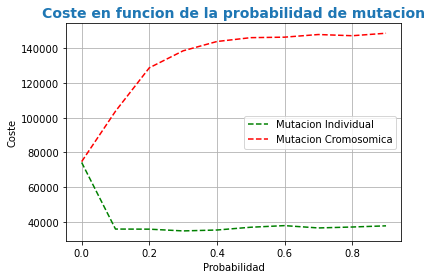

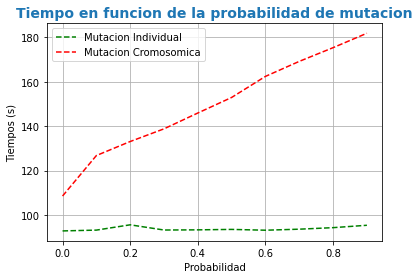

In [23]:
#120 ciudades
g1=Localizaciones(filename='./data/US120.txt')

costes_0=[]
tiempos_0=[]
probabilidad_mutacion= [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in tqdm(range(10), desc='Ejecuciones mutacion individual'):
    tiempos_i=[]
    costes_i=[]
    for k in range(5):
        start_time = time.time()
        sol=genetico(120, individuos=32, iteraciones=500, mut_ind=probabilidad_mutacion[i], mut_crom=probabilidad_mutacion[i], tipo_mutacion=0)
        tiempos_i.append(time.time() - start_time)
        costes_i.append(sol[1])
    costes_0.append(statistics.mean(costes_i))
    tiempos_0.append(statistics.mean(tiempos_i))

costes_1=[]
tiempos_1=[]
for i in tqdm(range(10), desc='Ejecuciones mutacion cromosomica'):
    tiempos_i=[]
    costes_i=[]
    for k in range(5):
        start_time = time.time()
        sol=genetico(120, individuos=32, iteraciones=500, mut_ind=probabilidad_mutacion[i], mut_crom=probabilidad_mutacion[i], tipo_mutacion=1)
        tiempos_i.append(time.time() - start_time)
        costes_i.append(sol[1])
    costes_1.append(statistics.mean(costes_i))
    tiempos_1.append(statistics.mean(tiempos_i))

graficar_datos("Coste en funcion de la probabilidad de mutacion","Probabilidad","Coste",probabilidad_mutacion,costes_0,costes_1,"Mutacion Individual","Mutacion Cromosomica")
graficar_datos("Tiempo en funcion de la probabilidad de mutacion","Probabilidad","Tiempos (s)",probabilidad_mutacion,tiempos_0,tiempos_1,"Mutacion Individual","Mutacion Cromosomica")

In [26]:
print(costes_0)

[74217.35129823475, 35942.287326013226, 35882.06822847346, 34873.68870926778, 35391.60016903985, 36988.81304369455, 37917.37587524327, 36581.16797979837, 37120.88820896171, 37791.92245854662]


Los resultados muestran la clara superioridad de la mutación individual sobre la cromosómica, tanto en tiempo como en coste. Por lo cual nos quedamos con ella entre los 2 métodos.

Luego el tiempo en  funcion de la probabilidad es muy constante, por lo que esto no será un factor determinante en la elección de la mejor probabilidad para la mutación.

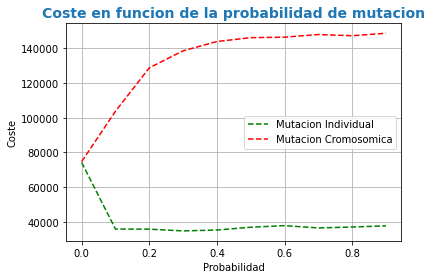

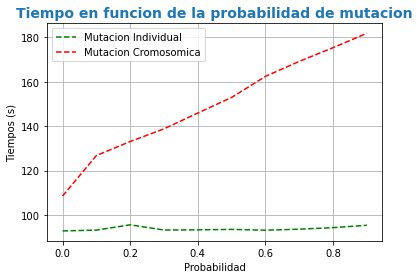
En coste si que se nota una clara mejoría a partir del 0.10, y estos resultados se mantienen practicamente costante durante todas las soluciones. Para observar con mayor detalle los resultados únicamennte de  la individual los imprimimos y observamos como los mejores resultadoos, aunque sin una diferencia abismal, se dano con la probabilidad de 0.3 y por ello esta será nuestra eleccion: mutacion individual con una probabilidad de 0.3.

lA DURACIÓN DE ESTAS PRUEBAS FUE DE 3 HORAS Y 20 APROX

In [30]:
def graficar_datos(titulo, etiqueta_x, etiqueta_y, datos_x, datos_y_1):
    """
    Grafica datos dados los parámetros.

    Parameters:
        titulo (str): Título de la gráfica.
        etiqueta_x (str): Etiqueta del eje x.
        etiqueta_y (str): Etiqueta del eje y.
        datos_x (list): Valores del eje x.
        datos_y_1 (list): Valores del primer conjunto de datos.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='rectilinear')

    ax.plot(datos_x, datos_y_1, '--', color="green")

    ax.set_title(titulo, fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'tab:blue'})
    ax.set_xlabel(etiqueta_x)
    ax.set_ylabel(etiqueta_y)
    
    # Agregar rejilla
    ax.grid(True)

    plt.show()

Ejecuciones segun numero de iteraciones:   0%|          | 0/7 [00:00<?, ?it/s]

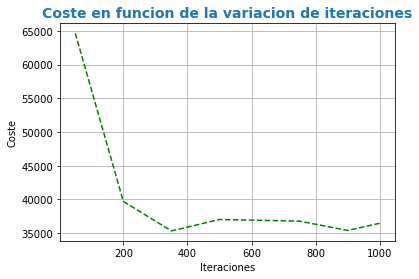

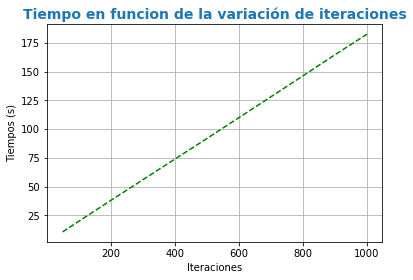

In [34]:
#120 ciudades
g1=Localizaciones(filename='./data/US120.txt')

costes_0=[]
tiempos_0=[]
iteraciones=[50,200,350,500,750,900,1000]
for i in tqdm(range(7), desc='Ejecuciones segun numero de iteraciones'):
    tiempos_i=[]
    costes_i=[]
    for k in range(5):
        start_time = time.time()
        sol=genetico(120, individuos=32, iteraciones=iteraciones[i], mut_ind=0.3)
        tiempos_i.append(time.time() - start_time)
        costes_i.append(sol[1])
    costes_0.append(statistics.mean(costes_i))
    tiempos_0.append(statistics.mean(tiempos_i))

graficar_datos("Coste en funcion de la variacion de iteraciones","Iteraciones","Coste",iteraciones,costes_0)
graficar_datos("Tiempo en funcion de la variación de iteraciones","Iteraciones","Tiempos (s)",iteraciones,tiempos_0,)


#### Respuestas y evaluación

Recordatorio: No olvides escribir tu nombre y apellidos en la segunda celda de este documento.
La respuestas a las preguntas deben venir acompañadas de las implementaciones necesarias para su respuesta.

*P3.1: Implementación básica* (5 puntos)

La implementación básica se evaluará mediante un cuestionario automático de evaluación. Este lo realizarás en la primera sesión tras la entrega, y se centrará en la resolución por tu parte de diversas cuestiones prácticas relacionadas con la implementación realizada, pudiendo ser necesaria la ejecución, adaptación y modificación de la misma. 

**Pregunta 1.**

Independientemente del cuestionario automático de evaluación, considera siempre que las preguntas planteadas en el notebook deben ser respondidas también. Esas preguntas generales están diseñadas para formarte, y te servián para razonar y reflexionar sobre el tema, así como también para fomentar una discusión constructiva con los docentes en caso de dudas.

El algoritmo se basa en la funcion principal llamada genetico que tiene los siguientes **parámetros de entrada**:

	-tam_poblacion: tamaño de los caminos que son los individuos de la población
	-individuos: numeros de elementos que tiene la población
	-iteraciones: numero de iteraciones que realiza el algoritmo
	-prob_cruce: probabilidad que establecemos para que se ejecute el algoritmo de cruce o no
	-mut_ind: probabilidad de que se de una mutación cuando usamos la mutacion individual
	-mut_crom: probabilidad de que se de una mutación cuando usamos la mutacion cromosómica
	-tipo_mutacion: selección del tipo de mutación a utilizar
	-tipo_generacion: seleccion del tipo de obtener la nueva generacion
    
Ya dentro de genérico nos encontramos primeramente con generar_poblacion la cual es la funcion encargada de obtener n individuos con un tamaño dado. A continuación, ejecutamos el algoritmo el numero de veces marcado por nuestro parametro iteraciones. Dentro de esto comenzamos creando una copia de la población para no trabajar sobre la original y tambien creamos el array hijos donde guardaremos las soluciones obtenidas de los cruces y mutaciones. 

Mediante la función cruce. realizamos el cruce de los padres para obtener sus hijos. A continuación, mediante la función mutar, probamos si se realiza la mutación y en caso afirmativo de realiza. Los elementos obtenidos los almacenamos finalmente en el array hijos. Por último en la iteración generamos la nueva generación a partir de la cual comenzaremos a trabajar en la sigueinte iteración.

El mecaminsmo de selección escogido para mi implementación es totalmente aleatorio como se indica en el enunciado, y genera el numero de individuos que deseemos de un tamaño dado. Estas soluciones son siempre válidas y obvian los 0s iniciales y finales que contienen.

Para verificar nuestra implementación, hemos realizado una serie de ejecuciones de donde probamos con 8 y 120 ciudades ejecutándose en repetidas ocasiones para obtener resultados más fiables.

*P3.2: Laboratorio* (5 puntos)

**Pregunta 2**

La ejecución se baso en variar el numero de individuos variandolos desde 2 (siendo este el minimo a partir de l cual se pueden generar hijos) hasta 128, obteniendo los valores a partir de las potencias de 2. Al comienzo las ejecuciones son muy breves, pero a partir de 64 se disparan y es por eso que solo pusimos 3 repeticiones de cada ejecución (las 3 de 128 individuos llevaron mas de 1 hora cada vez) a partir de la cual se toman sus valores medios para las gráficas. En total el tiempo de ejecución se acerco a las 4 horas.

Las gráficas obtenidas muestran a la vez los resultados de ambos tipos de de generacion en relación con el tiempo y el coste. Son las siguientes:

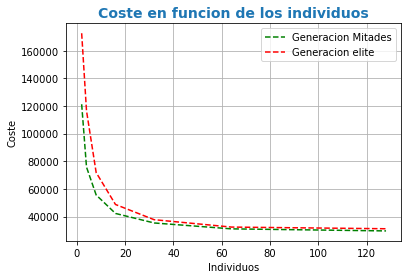   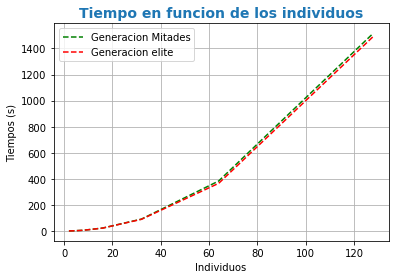

Tras esta prueba, la solución que sacamos es que los mejores resultados se empizan a obtener a partir de 64 individuos y despues de esto la mejora no justifica el tiempo de ejecución que se dispara. Con 32 individuos los resultados ya son buenos y los tiempos se mejoran en mas de un 50%.

La diferencia de tiempos entre 32 y 64 en coste no es muy notable, y al no ser una mejoría tan grande, por temas de rendimiento nos quedaremos finalmente con las ejecuciones de 32 individuos. Esta ejecución de 32 individuos representa el equilibrio entre tiempos y coste.

En cuanto las diferencias según la variante seleccionadas practicamente no se aprecian, y siendo mitades algo mejor en coste y siendo los tiempos iguales practicamente, nos quedamos con mitades. Nuestra elección valorando los puntos tenidos en cuenta anteriormente es la siguiente: **mitades con 32 individuos**.

**Pregunta 3.**

Las pruebas realizadas se realizaron con saltos de 0.1 desde 0 hasta 0.9. Las iteraciones para cada una de estas probabilidades fueron de 5 ejecuciones para cada tipo de mutación. Tras realizar las pruebas durante 3 horas y 20 aproximadamete, los resultados obtenidos son los siguientes:

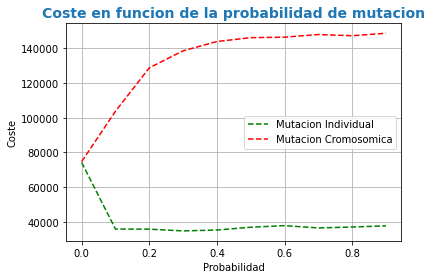
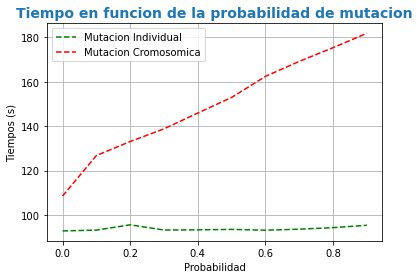

Los resultados muestran la clara superioridad de la mutación individual sobre la cromosómica, tanto en tiempo como en coste. Por lo cual nos quedamos con la mutación individual entre los 2 métodos mencionados.

Luego el tiempo en  funcion de la probabilidad es muy constante, por lo que esto no será un factor determinante en la elección de la mejor probabilidad para la mutación.

En coste si que se nota una clara mejoría a partir del 0.10, y estos resultados se mantienen practicamente costante durante todas las soluciones. Para observar con mayor detalle los resultados únicamennte de  la individual los imprimimos y observamos como los mejores resultadoos, aunque sin una diferencia abismal, se dano con la probabilidad de 0.3 y por ello esta será nuestra eleccion: 
    **mutacion individual con una probabilidad de 0.3.**

Pregunta 4.

Las pruebas se realizaron vaariando el numero de iteraciones de 150 en 150, desde 50 en adelante y añadiendo la límite, aunque no tocaba, 1000. Se realiaron 5 iteraciones por cada prueba y el tiempo de ejecución fue de 1 hora. Los resultados obtenidos son los siguientes:

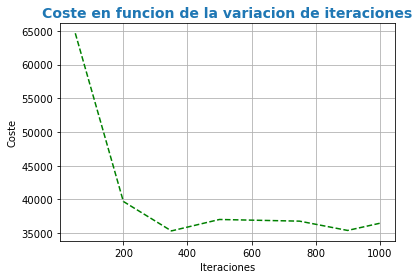
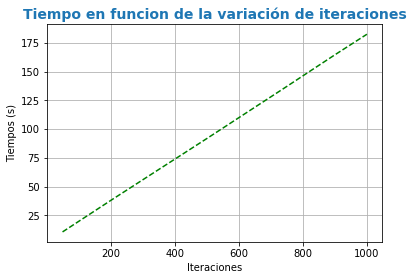

Podemos observar como el coste a partir de las 300 iteraciones se estabiliza, con pequeñas variaciones que son propias de la aleatoridad de las soluciones iniciales, ya que con más iteraciones se podrán obtener mejores soluciones, nunca peores, salvo excepciones con mutaciones que no tiene importancia en este apartado. la variación se debe a que solo se hacen 5 iteraciones, lo que no es un número tampoco demasiado grande.

Los tiempos, como cabía de esperar, van aumentando linealmente según aumenta el numero de iteraciones. Debido a las 2 características ya analizadas, se decide que la **mejor opción es la de 300 iteraciones** ya que no se pierde rendimiento en el coste a penas  y los tiempos mejoran sustancialmente.

El informe a elaborar no debe exceder la longitud máxima de 1200 palabras.


**NUESTRA MEJOR SOLUCION**

Tendría los siguientes parámetros:

    -Tipo de generación: mitades
    -Numero de individuos: 32
    -Tipo de mutación: individual con 0.3 de probabilidad
    -Número de iteraciones: 300

El comando sería el siguiente:
            sol=genetico(120, individuos=32, iteraciones=32, mut_ind=0.3)
    

Aclaraciones: La evaluación de esta parte se llevará a cabo en términos de la completitud y correctitud del laboratorio implementado, así como de la calidad del propio informe, que debe ser conciso y preciso, pudiendo acompañarse de gráficas y tablas que faciliten y fundamenten la explicación e argumentación. Es muy importante explicar de manera clara, precisa y fundamentada. Se reservará hasta un punto que se asignará en términos de la calidad de la mejor solución obtenida entre el conjunto de las prácticas entregadas (es por ello que no debes olvidar marcar en tu informe muy claramente cuál ha sido tu mejor solución y con qué configuración/versión).



In [23]:
import time

tiempos_i=[]

start_time = time.time()
sol=genetico(120, individuos=32, iteraciones=300, mut_ind=0.3)
tiempos_i.append(time.time() - start_time)

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio
Hay cambio

In [26]:
print(sol[1])
print(tiempos_i)

174596.2940572605
[78.3803813457489]
